# Data visualizations using R

## Customizing `ggplot` graphs #2

In this lesson, we will discuss non-data visual changes to our graphs using the [`theme()`](https://ggplot2.tidyverse.org/reference/theme.html) layer.  
Let's start by recreating the graph from the previous section. 

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

Warning message:
"package 'tidyr' was built under R version 4.0.5"
Warning message:
"package 'readr' was built under R version 4.0.5"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



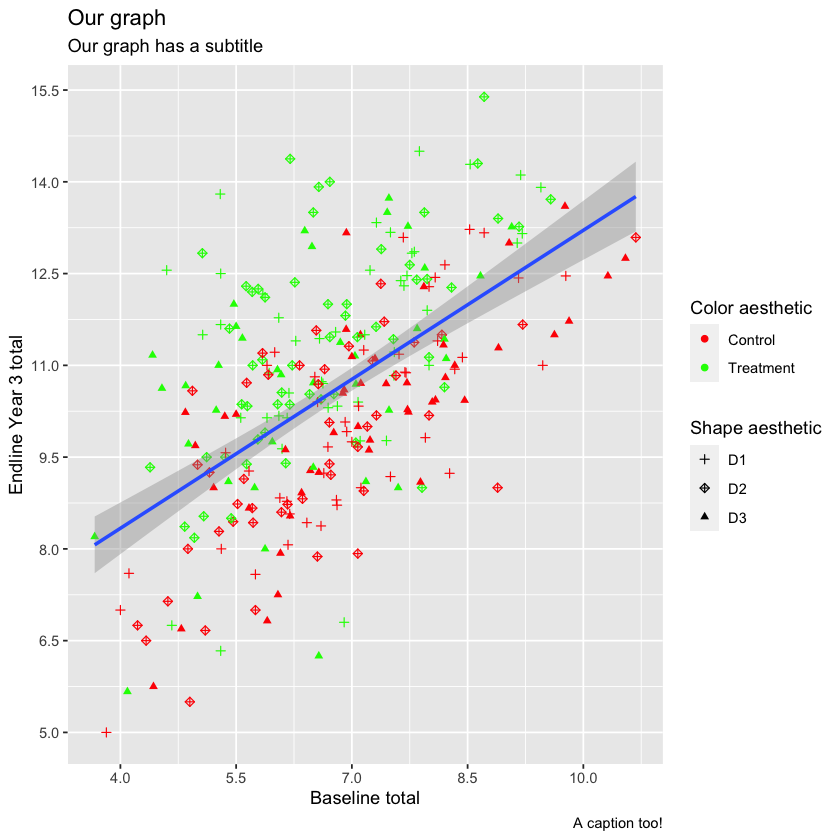

In [1]:
library("tidyverse")

mydata <- read_csv("https://raw.githubusercontent.com/arkadeep/R-Bootcamp-Data-Visualization/main/Assets/2_data/EG_DIB.csv", show_col_types = FALSE)
mydata$district <- factor(sample.int(3, nrow(mydata), replace = T))

labs <- c("1" = "Treatment", "0" = "Control")
colors <- c("0" = "red", "1" = "green")
labs_district <- c("1" = "D1", "2" = "D2", "3" = "D3")


plot1 <- ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
       geom_point(aes(color = factor(treatment), shape = district), na.rm = TRUE) +
       geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
       scale_x_continuous(breaks = seq(from = 4, to = 12, by = 1.5)) +
       scale_y_continuous(breaks = seq(from = 5, to = 16, by = 1.5)) +
       scale_color_manual(
              values = colors,
              labels = labs,
              name = "Group"
       ) +
       scale_shape_manual(
              values = c(3, 9, 17),
              name = "District",
              labels = labs_district
       ) +
       guides(
              color = guide_legend(title = "Color aesthetic"),
              shape = guide_legend(title = "Shape aesthetic")
       ) +
       labs(
              title = "Our graph",
              subtitle = "Our graph has a subtitle",
              caption = "A caption too!",
              x = "Baseline total",
              y = "Endline Year 3 total"
       )

plot1

`ggplot` comes inbuilt with several default themes. 

In [ ]:
plot1 + theme_bw()

In [ ]:
plot1 + theme_dark()

In [ ]:
plot1 + theme_linedraw()

In [ ]:
plot1 + theme_light()

In [ ]:
plot1 + theme_minimal()

In [ ]:
plot1 + theme_classic()

In [ ]:
plot1 + theme_void()

Each `theme_xxx` function cam take two arguments: 
1. `base_size`: to change the font size
2. `base_family`: to change the font face

In [ ]:
plot1 + 
    theme_classic(
        base_size = 18,
        base_family = "mono"
    )

While the inbuilt themes can be a quick way to change the way your graph looks, you will probably want to customize it further. This can be done using the `theme()` layer. It is usually convenient to build your the modifications on top of an inbuilt theme. `theme_classic()` serves as a good starting point as it removes most elements which would otherwise be considered chart junk. Let's discuss some of the most commonly used parameters available to us. 

### Super parameters

There are 3 "super" parameters. If you specify arguments for these, those would be carried over to every visual element they are mapped to. 
* `line`: Used to change _all_ line elements. This includes the axis lines, axis ticks and the panel grids. Done through the `element_line()` function. 
* `rect`: Used to change _all_ border and background elements. This includes the panel background, plot background, etc. Done through the `element_rect()` function. 
* `text`: Used to change _all_ text elements. This includes plot titles, axis titles, legend key text, etc. Done through the `element_text()` function. 

This [page](https://ggplot2.tidyverse.org/reference/element.html) details the full capabilities of the `element_xxx` functions. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        text = element_text(
            size = 18,
            color = "blue"
        ),
        rect = element_rect(
            fill = "grey80",
            color = "green"
        ),
        line = element_line(
            size = 0.25,
            color = "red"
        )
    )

Let's go over each element:
#### `text` 

```r
text = element_text(
            size = 18,
            color = "blue"
        )
```
We are changing the size and color of every text element in the plot. But you might have noticed that not _everything_ changes. The axis tick labels are still appearing in black. This is surprising, since the `axis.text` is supposed to inherit from the `text` parameter.  
<br>

The reason why the text formatting does not get applied to the axis tick labels is because our `theme()` function has been applied on top of the the inbuilt `theme_classic()`. `theme_classic()` applies certain axis tick label formatting which overrides what we specify in the `text` parameter. Therefore, if we want to change the axis label text, we will need to pass arguments to the `axis.text` parameter.  

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        text = element_text(
            size = 18,
            color = "blue"
        ),
        axis.text = element_text(
            color = "blue"
        )
    )

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        text = element_text(
            size = 18,
            color = "blue"
        ),
        rect = element_rect(
            fill = "grey80",
            color = "green"
        ),
        line = element_line(
            size = 0.25,
            color = "red"
        )
    )

#### `rect`

```R
rect = element_rect(
            fill = "grey80",
            color = "green"
        )
```
We are changing the fill to a shade of grey and the outline to green for each element covered under `rect`. However as with `text`, you will notice that some elements, such as the panel background is unchanged. This is again because of modifications applied by `theme_classic()`. Specifying these through `panel.background` will do the trick. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        rect = element_rect(
            fill = "grey80",
            color = "green"
        ),
        panel.background = element_rect(
            fill = "grey80",
            color = "green"
        )
    )

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        text = element_text(
            size = 18,
            color = "blue"
        ),
        rect = element_rect(
            fill = "grey80",
            color = "green"
        ),
        line = element_line(
            size = 0.25,
            color = "red"
        )
    )

#### `line`

```R
line = element_line(
            size = 0.25,
            color = "red"
        )
```

We are changing the size, which in this case is reflected as the width of the axis line and axis ticks and setting the color as red. But again, due to modifications set by `theme.classic()`, the color is not applied. To set the axis line and axis ticks as red, we will have to specify them through `axis.line` and `axis.ticks`. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        line = element_line(
            size = 0.25,
            color = "red"
        ),
        axis.line = element_line(
            color = "red"
        ),
        axis.ticks = element_line(
            color = "red"
        )
    )

While these super parameters are a handy way to change the look of our graph very quickly, they have some limitations: 
* Inbuilt themes will override certain modifications. 
  * This can overcome by modifying the theme, will be discussed later. 
* No control over specific elements. In most use cases, you will probably want to specify exactly which elements you are interested in modifying. 

### Axis parameters

#### Axis title

Modifications are done through `element_text`. Some parameters include:

* `axis.title`
* `axis.title.x`: inherits from `axis.title`
* `axis.title.y`: inherits from `axis.title`

If you want to apply the same visual modifications to both axes, you can use `axis.title` only as `axis.title.x` and `axis.title.y` will automatically inherit those properties.

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        axis.title = element_text(
            size = 20, 
            color = "orange"
        )
    )

However if the axes are to have distinct visual modifications, you will need to use both `axis.title.x` and `axis.title.y`. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        axis.title.x = element_text(
            size = 20, 
            color = "orange"
        ), 
        axis.title.y = element_text(
            size = 10,
            color = "blue"
        )
    )

#### Axis text

Modifications are done through `element_text`. Some parameters include:

* `axis.text`
* `axis.text.x`: inherits from `axis.text`
* `axis.text.y`: inherits from `axis.text`

Inheritance works the same way as `axis.title`. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        axis.text = element_text(
            size = 20
        ), 
        axis.text.x = element_text(
            color = "blue"
        ),
        axis.text.y = element_text(
            color = "orange"
        )
    )

#### Axis tick marks

Modifications are done through `element_line`. Some parameters include:

* `axis.ticks`
* `axis.ticks.x`: inherits from `axis.ticks`
* `axis.ticks.y`: inherits from `axis.ticks`

Inheritance works the same way as `axis.title`. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        axis.ticks = element_line(
            size = 5
        ), 
        axis.ticks.x = element_line(
            color = "blue"
        ),
        axis.ticks.y = element_line(
            color = "orange"
        )
    )

#### Axis tick length

Modifications done through the `unit` function. Some parameters include: 

* `axis.ticks.length`
* `axis.ticks.length.x`: inherits from `axis.ticks.length`
* `axis.ticks.length.y`: inherits from `axis.ticks.length`

Inheritance works the same way as `axis.title`.

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        axis.ticks.length.x = unit(.5, "cm"),
        axis.ticks.length.y = unit(-0.5, "cm")
    )

### Legend parameters

#### Legend background

`legend.background` with `element_rect`

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.background = element_rect(
            fill = "grey85",
            color = "black",
            linetype = 8
        )
    )

#### Legend margin

`legend.margin` with `margin()`

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.margin = margin(
            t = 2,
            r = 0.5,
            b = 2,
            l = 1, 
            unit = "cm"
        )
    )

#### Legend spacing

Modifications done through the `unit` function. Parameters include: 

* `legend.spacing`
* `legend.spacing.x`: inherits from `legend.spacing`
* `legend.spacing.y`: inherits from `legend.spacing`

Inheritance works the same way as `axis.title`.

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.spacing.x = unit(1, "cm"),
        legend.spacing.y = unit(0.5, "cm")
    )

#### Legend key

Background underneath the legend keys. `legend.key` with `element_rect`.

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.key = element_rect(
            fill = "grey95",
            color = "black"
        )
    )

#### Legend key size, height and width

Use with `unit`. `legend.key.height` and `legend.key.width` inherit from `legend.key.size` or you can specify them separately. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.key = element_rect(
            fill = "grey95",
            color = "black"
        ),
        legend.key.height = unit(2, "cm"),
        legend.key.width = unit(1, "cm")
    )

#### Legend text

Refers to the legend labels. Use `legend.text` with `element_text`. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.text = element_text(
            face = "bold",
            color = "blue"
        )
    )

#### Legend text alignment

Use a number between 0 (left) and 1 (right) with `legend.text.align`. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.text = element_text(
            face = "bold",
            color = "blue"
        ),
        legend.text.align = 1
    )

#### Legend position

Changes the position of the legend. Can be used with text ("top", "right", "bottom", "left") or a numeric vector containing 2 elements. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.position = "top"
    )

Use the numeric vector to place the legend inside the plot panel. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.position = c(0.90, .2)
    )

#### Legend direction

To switch between horizontal and vertical layouts. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.direction = "horizontal"
    )

#### Legend justification

Changes the justification of the legend. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.justification = "top"
    )

#### Legend box

Arrangement of multiple legend boxes, horizontal or vertical. Note the difference between this and `legend.direction`. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.box = "horizontal"
    )

#### Legend box justification

To change the justification of each legend within the overall legend bounding box. Used when there are multiple legends. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.box.just = "right"
    )

#### Legend box margin

Use `margin()` to set the margin around the overall legend area. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.box.margin = margin(
            r = 2,
            l = 4,
            unit = "cm"
        )
    )

#### Legend box background

Use `legend.box.background` with the `element_rect()` function to set the background of the legend. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.box.background = element_rect(
            color = "black",
            size = 1
        )
    )

The output does not look very good. Use `legend.box.margin` to increase the margins so that the boundary is clearly visible. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.box.background = element_rect(
            color = "black",
            size = 1
        ),
        legend.box.margin = margin(
            t = 0.25,
            r = 0.25, 
            b = 0.25,
            l = 0.25,
            unit = "cm"
        )
    )

#### Legend box spacing

Use the `unit()` function along with `legend.box.spacing` to change the space between the legend box and plotting area. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.box.background = element_rect(
            color = "black",
            size = 1
        ),
        legend.box.margin = margin(
            t = 0.25,
            r = 0.25, 
            b = 0.25,
            l = 0.25,
            unit = "cm"
        ),
        legend.box.spacing = unit(1.5, "cm")
    )

### Panel parameters

#### Panel background

Use `panel.background` with `element_rect` to change the background of the panel. Note that this is drawn underneath the plot that you have created. It is advisable to use the `fill` parameter with `NA` as argument so that the visualization is not distorted.  

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        panel.background = element_rect(
            color = "black",
            size = 1.5,
            fill = NA
        )
    )

##### Panel border

`panel.border` behaves quite similarly to `panel.background`, with the difference between that the former draws on top of the plot. As you can see below, the axis line have been drawn over. Again, it is advisable to specify `fill` as `NA` so that the data is not distorted. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        panel.border = element_rect(
            color = "blue",
            size = 1.5,
            fill = "NA"
        )
    )

#### Panel grids

To change the grid lines on the plot. Use with `element_line`.

Available parameters:
* `panel.grid`
* `panel.grid.major`: inherits from `panel.grid`
* `panel.grid.minor`: inherits from `panel.grid`
* `panel.grid.major.x`: inherits from `panel.grid.major`
* `panel.grid.major.y`: inherits from `panel.grid.major`
* `panel.grid.minor.x`: inherits from `panel.grid.minor`
* `panel.grid.minor.y`: inherits from `panel.grid.minor`

Inheritance works as expected. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        panel.grid.major.x = element_line(
            color = "grey85",
            size = 0.25
        ),
        panel.grid.minor.y = element_line(
            color = "blue",
            size = 0.25
        )
    )

### Plot parameters

#### Plot background

Use `plot.background` with `element_rect` to change the background of the entire plot. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        plot.background = element_rect(
            color = "blue",
            fill = "grey95"
        )
    )

#### Title, subtitle and caption

Use `plot.title`, `plot.subtitle` and `plot.caption` to change the appearance of the title, subtitle and caption respectively. Changes done through `element_text`. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        plot.title = element_text(
            size = 15,
            face = "bold",
            hjust = 0.5
        ),
        plot.subtitle = element_text(
            size = 12,
            face = "italic",
            hjust = 1,
            color = "blue"
        ),
        plot.caption = element_text(
            vjust = 1,
            hjust = 0
        )
    )

#### Plot margin

Plot margins can be changed to add space around the plot. Use the `unit()` function. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        plot.margin = unit(
            c(1,1,1,1), 
            "cm"
        )
    )

### Removing an element

Finally, if you have added an element but would like to remove it, you can do so from within the `theme` function by setting the relevant parament to `element_blank()`. Suppose we want to remove the legends titles. 

In [ ]:
plot1 + 
    theme_classic() +
    theme(
        legend.title = element_blank()
    )

### Final graph

We will now recreate the graph according to IDinsight formatting. If you are interested in using the Inter font, you will have add it to R using the `showtext` package as it is not available by default. When running on your computer, change the `path` variable to where the font is located. 

In [9]:
library('showtext')

font_add_google("Inter", "Inter")

# path = "https://www.dropbox.com/s/hi532xij5y69z17/Inter-VariableFont_slnt%2Cwght.ttf?dl=0"
# 
# font_add(
#     family = "Inter",
#     regular = path
# )
showtext_auto()

ERROR: Error in check_font_path(regular, "regular"): font file not found for 'regular' type


In [ ]:
colors <- c("0" = "#A8BFEB", "1" = "#173363")

final_plot <- ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
       geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
       geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
       scale_x_continuous(breaks = seq(from = 4, to = 12, by = 1.5)) +
       scale_y_continuous(breaks = seq(from = 5, to = 16, by = 1.5)) +
       scale_color_manual(
              values = colors,
              labels = labs,
              name = "Group"
       ) +
       guides(
              color = guide_legend(title = "Group")
       ) +
       labs(
              title = "Correlation between Baseline and Endline 3 scores",
              x = "Baseline total",
              y = "Endline Year 3 total",
              caption = "Source: EG DIB Dataset"
       )

In [ ]:
final_plot <- final_plot + 
    theme_classic() +
    theme(
        text = element_text(
            family = "Inter"
        ),
        axis.text = element_text(
            size = 12
        ),
        axis.title = element_text(
            size = 14
        ),
        legend.box.background = element_rect(
            color = "black"
        ),
        legend.box.margin = margin(
              t = 0.5,
              r = 0.5,
              b = 0.5, 
              l = 0.5,
              unit = "pt"
        ),
        legend.box = "horizontal",
        legend.position = c(0.9, 0.1),
        legend.text = element_text(
            size = 10
        ),
        plot.title = element_text(
            size = 17,
            hjust = 0.5
        ),
        plot.caption = element_text(
            size = 10,
            vjust = -1,
            hjust = 0
        )
    )

#### Adding the IDinsight logo

An optional final step would be to add the IDinsight logo to the bottom right corner of the plot. This relies on loading the logo as an image and then applying it to the plot. You will need the `magick` and `grid` packages. 

In [2]:
library('magick')
library('grid')

final_plot

logo <- image_read("https://github.com/arkadeep/R-Bootcamp-Data-Visualization/blob/main/Assets/1_images/IDi-Logo-Master-RGB-Dark-Blue%20(1).png?raw=true")

grid.raster(logo, x = 0.94, y = 0.02, width = unit(1, 'inches'))

Linking to ImageMagick 6.9.12.3
Enabled features: cairo, fontconfig, freetype, heic, lcms, pango, raw, rsvg, webp
Disabled features: fftw, ghostscript, x11



ERROR: Error in eval(expr, envir, enclos): object 'final_plot' not found


#### 

## Next steps

In the upcoming lessons, we will explore 

## Notes

You can check out the `ggthemes` package to greatly extend the number of themes available to use. 